# Notebook for marker genes/peaks - dot plots, heatmaps, etc.

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the master adata object (multiome, all timepoints, low-quality cells were filtered out)
# NOTE that this adata has "RNA" counts in the counts layer
adata = sc.read_h5ad("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/processed_data/01_Signac_processed/integrated_RNA_ATAC_counts_RNA_master_filtered.h5ad")
adata

AnnData object with n_obs × n_vars = 94562 × 32057
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'nucleosome_signal', 'nucleosome_percentile', 'TSS_enrichment', 'TSS_percentile', 'nCount_SCT', 'nFeature_SCT', 'global_annotation', 'nCount_peaks_bulk', 'nFeature_peaks_bulk', 'nCount_peaks_celltype', 'nFeature_peaks_celltype', 'nCount_peaks_merged', 'nFeature_peaks_merged', 'SCT_weight', 'peaks_merged_weight', 'nCount_Gene_Activity', 'nFeature_Gene_Activity', 'nCount_peaks_integrated', 'nFeature_peaks_integrated', 'dataset', 'integrated_weight', 'peaks_integrated_weight', 'wsnn_res_0_8', 'seurat_clusters', 'data_source', 'annotation_ML', 'scANVI_zscape', 'annotation_ML_coarse', 'dev_stage'
    var: 'features'
    uns: 'annotation_ML_coarse_colors', 'annotation_ML_colors', 'dataset_colors', 'global_annotation_colors', 'log1p', 'scANVI_zscape_colors'
    obsm: 'X_umap.atac', 'X_umap.rna', 'X_wnn.umap'
    layers: 'counts'

In [6]:
markers_15somites = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/table_marker_genes/marker_genes_15somites.csv", index_col=0)
markers_15somites.head()

,cell_annotation,timepoint,annotation_human_readable,marker genes,Unnamed: 5,Unnamed: 6
leiden,,,,,,
1,somite_lrrc17_comp_ripply1,15somite,somite,lrrc17,comp,ripply1
2,optic_vesicle_rx1_vsx2,15somite,optic vesicle,rx1,vsx2,NaN
3,paraxial_mesoderm_tbx16_myf5_hes6,15somite,paraxial mesoderm,tbx16,myf5,hes6
4,neural_crest_crestin_ednrab_dlx2a,15somite,neural crest,crestin,ednrab,dlx2a
5,periderm_cldni_cfl1l,15somite,periderm,cldni,cfl1l,NaN


In [14]:
markers_15somites.columns

Index(['cell_annotation', 'timepoint', 'annotation_human_readable',
       'marker genes', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [20]:
np.unique(list_markers)

array(['acy3', 'anxa4', 'apobec2a', 'atp1b1b', 'bricd5', 'cebpa', 'cfl1l',
       'chd17', 'cldn15a', 'cldnc', 'cldni', 'comp', 'cpox', 'crestin',
       'ctslb', 'dlx2a', 'ednrab', 'elavl3', 'emilin3a', 'etnk1', 'etv5a',
       'fezf1', 'fli1b', 'foxa2', 'foxg1a', 'foxi3b', 'gata1a', 'gata5',
       'hand2', 'hbbe1', 'hes6', 'hoxd4a', 'icn2', 'irx7', 'jam2a',
       'kdrl', 'krt17', 'loxl5b', 'lrrc17', 'mcf2lb', 'myb', 'myf5',
       'myh7', 'myl1', 'myog', 'nan', 'nid1b', 'olig3', 'osr1', 'pitx3',
       'pkd1b', 'ppl', 'prrx1', 'ripply1', 'rx1', 'rxrga', 'scg3',
       'sec61a1l', 'sema3aa', 'shha', 'shhb', 'sncb', 'sox1b', 'spi1b',
       'stmn1b', 'surf4l', 'tbx16', 'tbx3b', 'tnnt2a', 'ttn1', 'unc45b',
       'vegfaa', 'vsx2'], dtype='<U32')

In [21]:
list_markers = []

for col_name in ["marker genes", "Unnamed: 5", "Unnamed: 6"]:
    list_temp = markers_15somites[col_name].tolist()
    list_markers = list_markers + list_temp

list_unique_markers = np.unique(list_markers)
list_unique_markers

array(['acy3', 'anxa4', 'apobec2a', 'atp1b1b', 'bricd5', 'cebpa', 'cfl1l',
       'chd17', 'cldn15a', 'cldnc', 'cldni', 'comp', 'cpox', 'crestin',
       'ctslb', 'dlx2a', 'ednrab', 'elavl3', 'emilin3a', 'etnk1', 'etv5a',
       'fezf1', 'fli1b', 'foxa2', 'foxg1a', 'foxi3b', 'gata1a', 'gata5',
       'hand2', 'hbbe1', 'hes6', 'hoxd4a', 'icn2', 'irx7', 'jam2a',
       'kdrl', 'krt17', 'loxl5b', 'lrrc17', 'mcf2lb', 'myb', 'myf5',
       'myh7', 'myl1', 'myog', 'nan', 'nid1b', 'olig3', 'osr1', 'pitx3',
       'pkd1b', 'ppl', 'prrx1', 'ripply1', 'rx1', 'rxrga', 'scg3',
       'sec61a1l', 'sema3aa', 'shha', 'shhb', 'sncb', 'sox1b', 'spi1b',
       'stmn1b', 'surf4l', 'tbx16', 'tbx3b', 'tnnt2a', 'ttn1', 'unc45b',
       'vegfaa', 'vsx2'], dtype='<U32')

In [7]:
markers_30somites = pd.read_csv("/hpc/projects/data.science/yangjoon.kim/zebrahub_multiome/data/table_marker_genes/marker_genes_30somites.csv", index_col=0)
markers_30somites.head()

,leiden,cell_annotation,timepoint,version,annotation_human_readable,marker genes,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,zfa_id,is_cell_type,is_in_zfin,comments,ml reply,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,0,diencephalon_pax6a_fgfr3_sox2_foxb1a,30somite,before_aug_9,diencephalon,pax6a,fgfr3,sox2,foxb1a,NaN,...,ZFA:0000101,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,diencephalon_pax6a_fgfr3_sox2_foxb1a,30somite,aug_9,diencephalon,pax6a,fgfr3,sox2,foxb1a,NaN,...,ZFA:0000101,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,optic_cup_foxg1b_rx1_pax10,30somite,before_aug_9,optic cup,foxg1b,rx1,pax10,NaN,NaN,...,ZFA:0001202,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,optic_cup_foxg1b_rx1_pax10,30somite,aug_9,optic cup,foxg1b,rx1,pax10,NaN,NaN,...,ZFA:0001202,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2,hematopoietic_system_hbbe2_slc4a1a_gata1a,30somite,before_aug_9,hematopoietic system,hbbe2,slc4a1a,gata1a,NaN,NaN,...,ZFA:0005023,this is not a cell type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
list_markers = []

for col_name in ["marker genes", "Unnamed: 7", "Unnamed: 8","Unnamed: 9","Unnamed: 10","Unnamed: 11"]:
    list_temp = markers_30somites[col_name].tolist()
    list_markers = list_markers + list_temp

list_unique_markers_30 = np.unique(list_markers)
list_unique_markers_30

array(['actc1a', 'agr1', 'agr2', 'ak1', 'anxa1c', 'apeob', 'apobec2a',
       'atoh1a', 'atp1b1a', 'bmp2b', 'bmp6', 'cd63', 'cdh1', 'cdh5',
       'cebpa', 'cebpb', 'cfl1l', 'cldn7b', 'cldnh', 'col9a2', 'crestin',
       'ctslb', 'cxcr3.2', 'dct', 'desma', 'dlx3b', 'dusp2', 'egr2b',
       'elavl3', 'en1a', 'en2a', 'en2b', 'eno3', 'evpla', 'fezf1',
       'fezf2', 'fgf8a', 'fgfr3', 'fibina', 'foxa2', 'foxb1a', 'foxc1b',
       'foxd3', 'foxe3', 'foxg1a', 'foxg1b', 'fxr2', 'gata1a', 'gata5',
       'gata6', 'gch2', 'gsnb', 'hand2', 'hbbe2', 'he1.2', 'her15.1',
       'hes6', 'hgfa', 'hoxc13a', 'hsp90aa1.1', 'isl1', 'kdrl', 'lfng',
       'lft1', 'map2', 'meox1', 'mitfa', 'mylz3', 'myo1eb', 'myog', 'nan',
       'nkx6.1', 'ntn1b', 'olig2', 'olig4', 'osr1', 'pah', 'pax10',
       'pax6a', 'pdgfra', 'pitx3', 'plp1a', 'pmela', 'pmp22', 'ppl',
       'prox1a', 'ptx3', 'rac2', 'rx1', 'sema3e', 'shha', 'six1b',
       'six3a', 'slc4a1a', 'sox10', 'sox2', 'sox2b', 'sp8b', 'stm',
       'tbx15',

In [26]:
list_unique_markers_30

array(['actc1a', 'agr1', 'agr2', 'ak1', 'anxa1c', 'apeob', 'apobec2a',
       'atoh1a', 'atp1b1a', 'bmp2b', 'bmp6', 'cd63', 'cdh1', 'cdh5',
       'cebpa', 'cebpb', 'cfl1l', 'cldn7b', 'cldnh', 'col9a2', 'crestin',
       'ctslb', 'cxcr3.2', 'dct', 'desma', 'dlx3b', 'dusp2', 'egr2b',
       'elavl3', 'en1a', 'en2a', 'en2b', 'eno3', 'evpla', 'fezf1',
       'fezf2', 'fgf8a', 'fgfr3', 'fibina', 'foxa2', 'foxb1a', 'foxc1b',
       'foxd3', 'foxe3', 'foxg1a', 'foxg1b', 'fxr2', 'gata1a', 'gata5',
       'gata6', 'gch2', 'gsnb', 'hand2', 'hbbe2', 'he1.2', 'her15.1',
       'hes6', 'hgfa', 'hoxc13a', 'hsp90aa1.1', 'isl1', 'kdrl', 'lfng',
       'lft1', 'map2', 'meox1', 'mitfa', 'mylz3', 'myo1eb', 'myog', 'nan',
       'nkx6.1', 'ntn1b', 'olig2', 'olig4', 'osr1', 'pah', 'pax10',
       'pax6a', 'pdgfra', 'pitx3', 'plp1a', 'pmela', 'pmp22', 'ppl',
       'prox1a', 'ptx3', 'rac2', 'rx1', 'sema3e', 'shha', 'six1b',
       'six3a', 'slc4a1a', 'sox10', 'sox2', 'sox2b', 'sp8b', 'stm',
       'tbx15',

In [29]:
master_list_markers = list_unique_markers.tolist() + list_unique_markers_30.tolist()
master_list_markers = np.unique(master_list_markers)
master_list_markers

array(['actc1a', 'acy3', 'agr1', 'agr2', 'ak1', 'anxa1c', 'anxa4',
       'apeob', 'apobec2a', 'atoh1a', 'atp1b1a', 'atp1b1b', 'bmp2b',
       'bmp6', 'bricd5', 'cd63', 'cdh1', 'cdh5', 'cebpa', 'cebpb',
       'cfl1l', 'chd17', 'cldn15a', 'cldn7b', 'cldnc', 'cldnh', 'cldni',
       'col9a2', 'comp', 'cpox', 'crestin', 'ctslb', 'cxcr3.2', 'dct',
       'desma', 'dlx2a', 'dlx3b', 'dusp2', 'ednrab', 'egr2b', 'elavl3',
       'emilin3a', 'en1a', 'en2a', 'en2b', 'eno3', 'etnk1', 'etv5a',
       'evpla', 'fezf1', 'fezf2', 'fgf8a', 'fgfr3', 'fibina', 'fli1b',
       'foxa2', 'foxb1a', 'foxc1b', 'foxd3', 'foxe3', 'foxg1a', 'foxg1b',
       'foxi3b', 'fxr2', 'gata1a', 'gata5', 'gata6', 'gch2', 'gsnb',
       'hand2', 'hbbe1', 'hbbe2', 'he1.2', 'her15.1', 'hes6', 'hgfa',
       'hoxc13a', 'hoxd4a', 'hsp90aa1.1', 'icn2', 'irx7', 'isl1', 'jam2a',
       'kdrl', 'krt17', 'lfng', 'lft1', 'loxl5b', 'lrrc17', 'map2',
       'mcf2lb', 'meox1', 'mitfa', 'myb', 'myf5', 'myh7', 'myl1', 'mylz3',
       'my

In [ ]:
master_list_markers

In [37]:
missing_genes = ['acy3', 'apeob', 'chd17', 'hbbe1', 'nan', 'pmp22', 'prrx1', 'ptx3', 'sox2b', 'ttn1']

for gene in missing_genes:
    print("gene ", gene, " is ", gene in (adata.var_names))

gene  acy3  is  False
gene  apeob  is  False
gene  chd17  is  False
gene  hbbe1  is  False
gene  nan  is  False
gene  pmp22  is  False
gene  prrx1  is  False
gene  ptx3  is  False
gene  sox2b  is  False
gene  ttn1  is  False


In [40]:
adata.var_names[adata.var_names.str.startswith("acy")]

Index(['acy3.2', 'acy3.1', 'acyp1', 'acyp2', 'acy1', 'acy1.1'], dtype='object')

In [42]:
adata.var_names[adata.var_names.str.startswith("apo")]

Index(['apooa', 'apool', 'apoa1a', 'apof', 'apoda.2', 'apoda.1', 'apol1',
       'apom', 'apoa4b.1', 'apoa4b.2', 'apoa4b.2.1', 'apoeb', 'apoc1', 'apoc4',
       'apoa2', 'apoc2', 'apobb.1', 'apobb.2', 'apoba', 'apoa4a', 'apoea',
       'apoa1b', 'apobec2b', 'apoob', 'apodb', 'apobec2a'],
      dtype='object')

In [44]:
master_list_markers = [gene for gene in master_list_markers if gene not in missing_genes]
master_list_markers

['actc1a',
 'agr1',
 'agr2',
 'ak1',
 'anxa1c',
 'anxa4',
 'apobec2a',
 'atoh1a',
 'atp1b1a',
 'atp1b1b',
 'bmp2b',
 'bmp6',
 'bricd5',
 'cd63',
 'cdh1',
 'cdh5',
 'cebpa',
 'cebpb',
 'cfl1l',
 'cldn15a',
 'cldn7b',
 'cldnc',
 'cldnh',
 'cldni',
 'col9a2',
 'comp',
 'cpox',
 'crestin',
 'ctslb',
 'cxcr3.2',
 'dct',
 'desma',
 'dlx2a',
 'dlx3b',
 'dusp2',
 'ednrab',
 'egr2b',
 'elavl3',
 'emilin3a',
 'en1a',
 'en2a',
 'en2b',
 'eno3',
 'etnk1',
 'etv5a',
 'evpla',
 'fezf1',
 'fezf2',
 'fgf8a',
 'fgfr3',
 'fibina',
 'fli1b',
 'foxa2',
 'foxb1a',
 'foxc1b',
 'foxd3',
 'foxe3',
 'foxg1a',
 'foxg1b',
 'foxi3b',
 'fxr2',
 'gata1a',
 'gata5',
 'gata6',
 'gch2',
 'gsnb',
 'hand2',
 'hbbe2',
 'he1.2',
 'her15.1',
 'hes6',
 'hgfa',
 'hoxc13a',
 'hoxd4a',
 'hsp90aa1.1',
 'icn2',
 'irx7',
 'isl1',
 'jam2a',
 'kdrl',
 'krt17',
 'lfng',
 'lft1',
 'loxl5b',
 'lrrc17',
 'map2',
 'mcf2lb',
 'meox1',
 'mitfa',
 'myb',
 'myf5',
 'myh7',
 'myl1',
 'mylz3',
 'myo1eb',
 'myog',
 'nid1b',
 'nkx6.1',
 'ntn1b'

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided vi

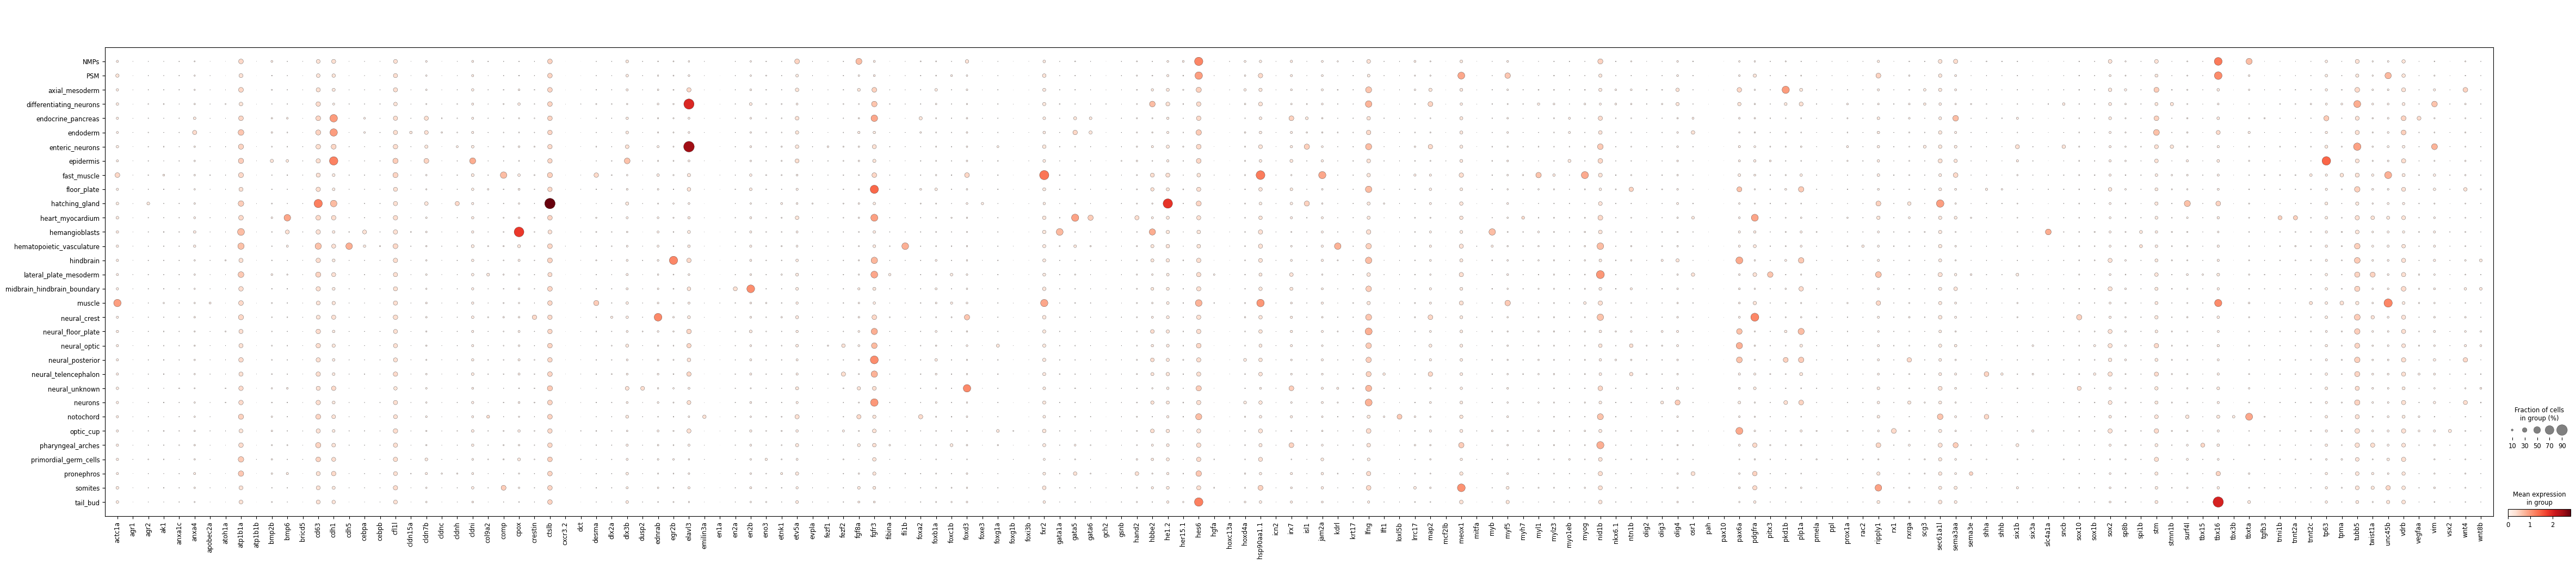

In [45]:
sc.pl.dotplot(adata, var_names = master_list_markers, groupby="annotation_ML_coarse")

In [53]:
sc.tl.rank_genes_groups(adata, groupby="annotation_ML_coarse", method = "wilcoxon")

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFram

In [54]:
sc.tl.filter_rank_genes_groups(adata, min_fold_change=3)

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a fu

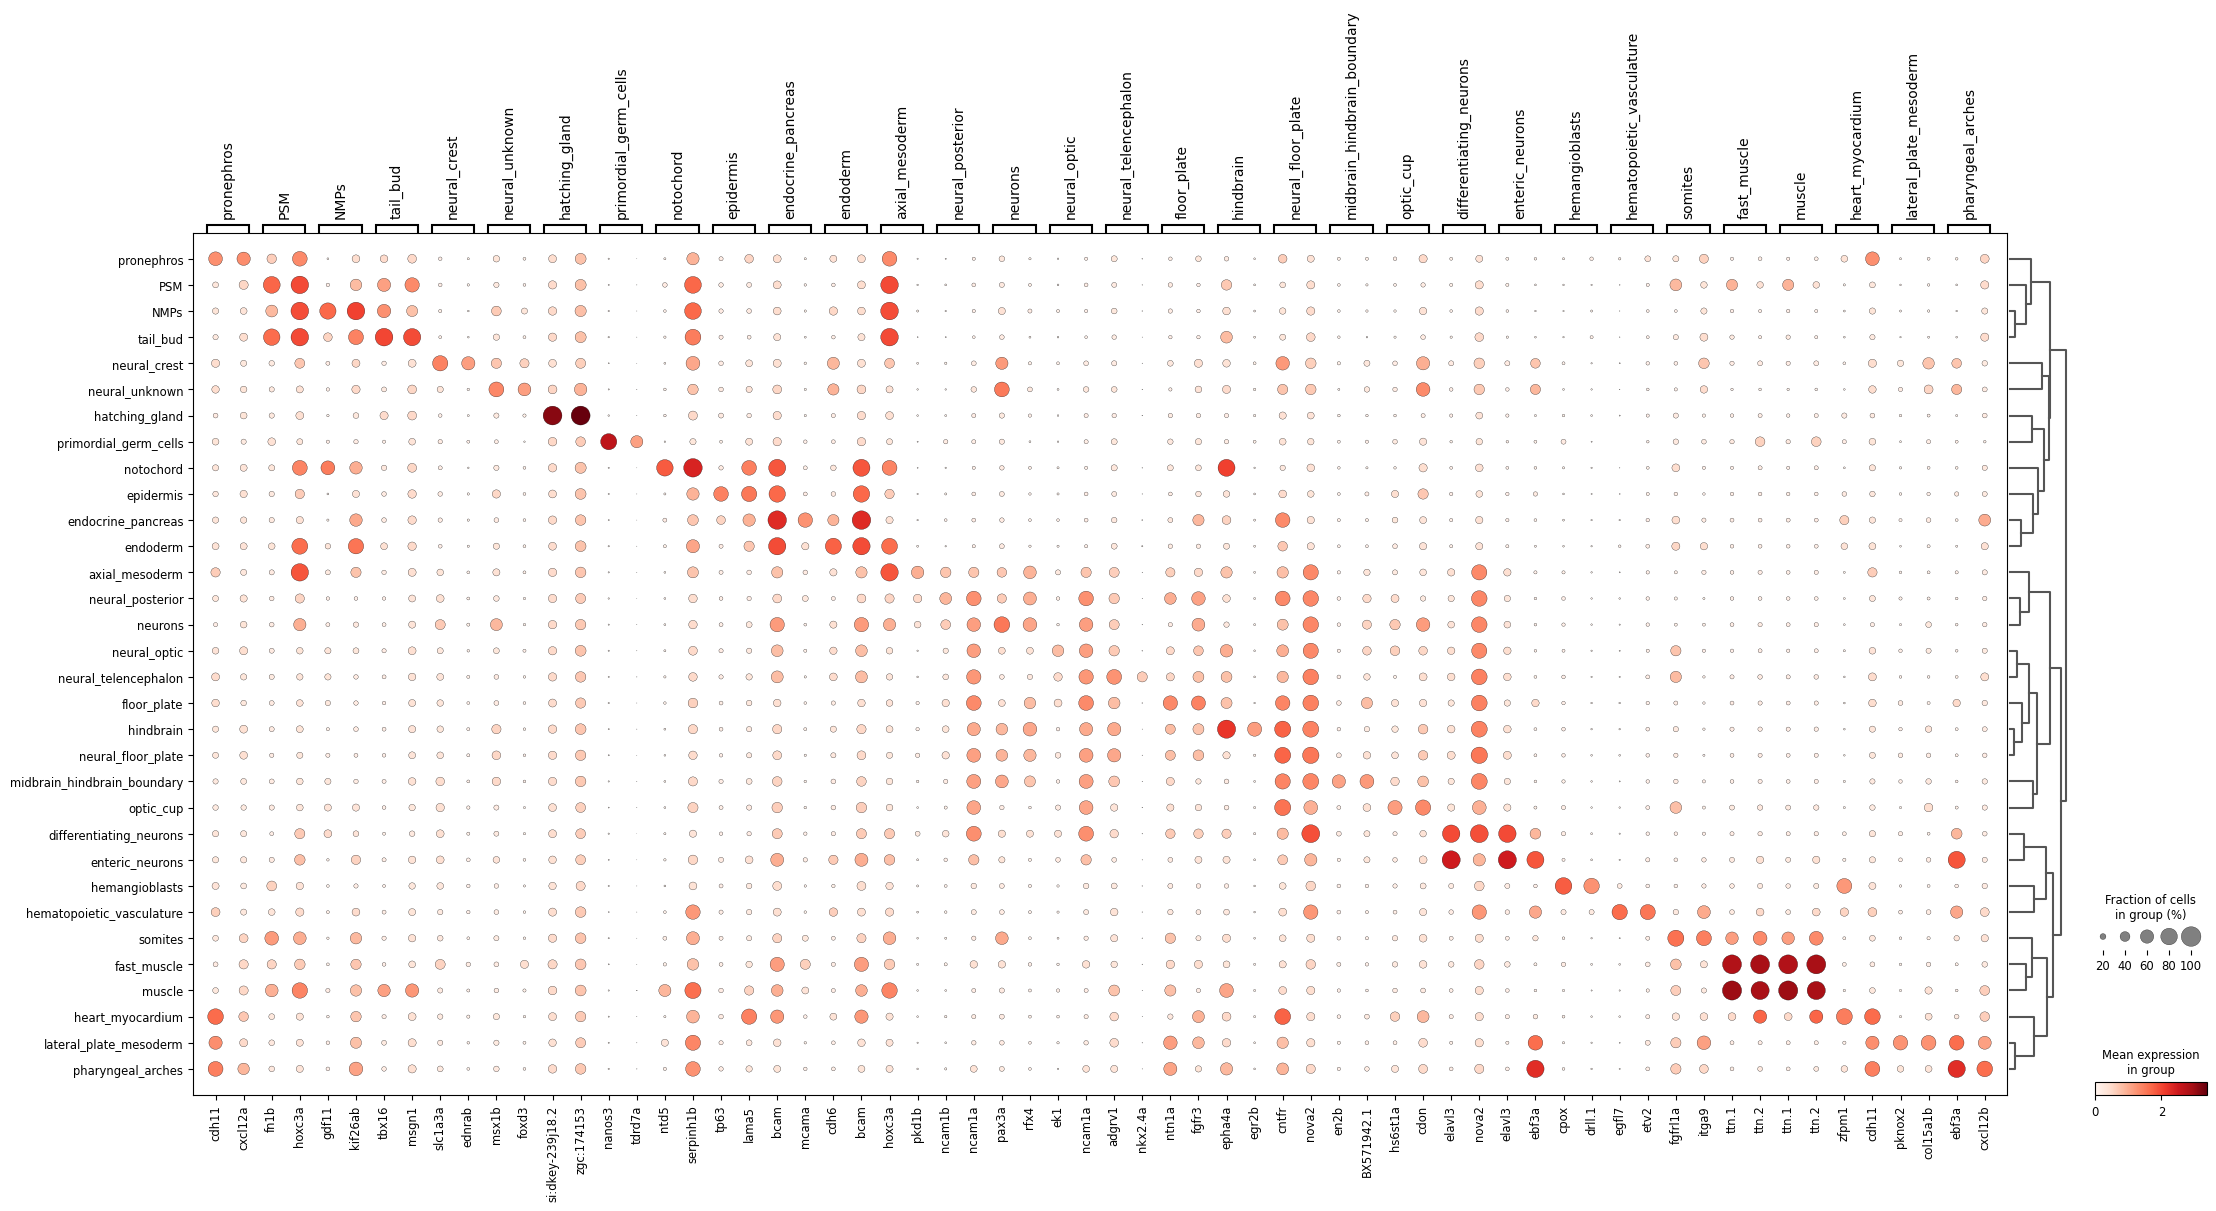

In [57]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=2)

In [ ]:
# sc.pl.rank_genes_groups_dotplot(
#     pbmc,
#     n_genes=4,
#     values_to_plot="logfoldchanges",
#     min_logfoldchange=3,
#     vmax=7,
#     vmin=-7,
#     cmap="bwr",
# )

/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a fu

         Falling back to preprocessing with `sc.pp.pca` and default params.


/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/hpc/user_apps/data.science/conda_envs/single-cell-base/lib/python3.10/site-packages/anndata/_core/anndata.py:522: FutureWarning: The dtype argument is deprecated and 

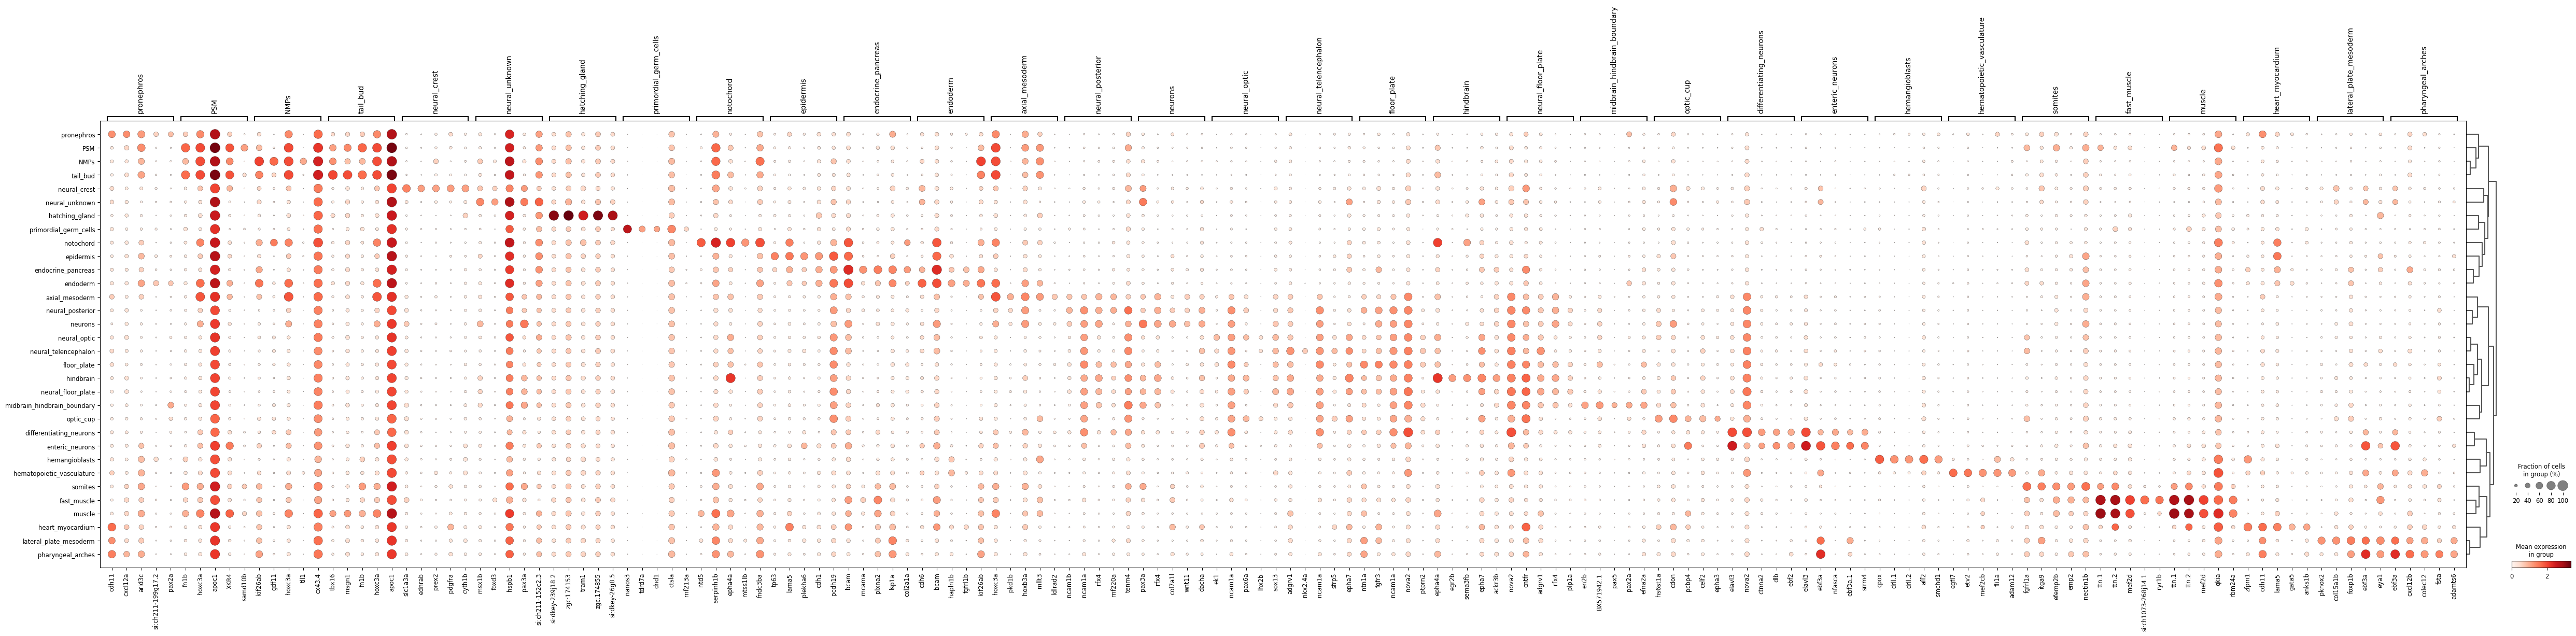

In [52]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=5)